In [90]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
ride_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [91]:
# Obtain the x and y coordinates for each of the three city types
urban=ride_data_complete[ride_data_complete["type"]=="Urban"]
suburb=ride_data_complete[ride_data_complete["type"]=="Suburban"]
rural=ride_data_complete[ride_data_complete["type"]=="Rural"]

urban_ride=urban.groupby(["city"]).count()["ride_id"]
urban_fare=urban.groupby(["city"]).mean()["fare"]
urban_drive=urban.groupby(["city"]).count()["driver_count"]

suburb_ride=suburb.groupby(["city"]).count()["ride_id"]
suburb_fare=suburb.groupby(["city"]).mean()["fare"]
suburb_drive=suburb.groupby(["city"]).count()["driver_count"]

rural_ride=rural.groupby(["city"]).count()["ride_id"]
rural_fare=rural.groupby(["city"]).mean()["fare"]
rural_drive=rural.groupby(["city"]).count()["driver_count"]

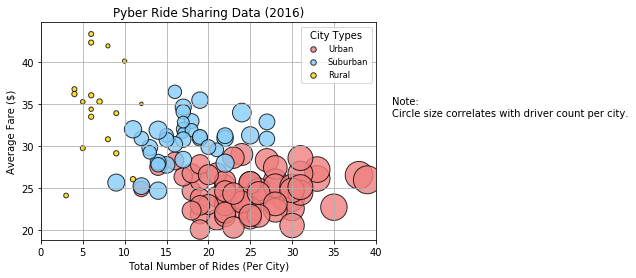

In [92]:
# Build the scatter plots for each city types

plt.scatter(urban_ride,urban_fare, s=20*urban_drive, c='lightCoral',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburb_ride, suburb_fare, c='LightskyBlue',
            s=10*urban_drive, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride, rural_fare, s=urban_drive, c='Gold',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

#Legend and Title specs
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)
plt.text(42, 35,"Note:")
plt.text(42, 33.5,"Circle size correlates with driver count per city.")

legend = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.show
plt.savefig("Pyber_Scatter.png")

## Total Fares by City Type

In [93]:
#Create DF
fares_city = ride_data_complete.groupby(["type"])["fare"].sum()
fares_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

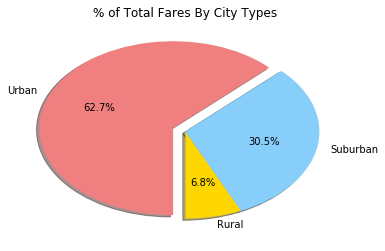

In [94]:
# Calculate Type Percents

# Build Pie Chart
   #Create index labels
fares_city.index
   
    #Set colors
colors = ["gold","lightskyblue","lightcoral"]

# Setting pie chart to explode mode
explode = (0, 0, 0.1)

# Setting the title
plt.title("% of Total Fares By City Types")

#Create the pie chart
plt.pie(fares_city, labels = fares_city.index, autopct = "%1.1f%%", colors = colors,
        explode = explode, shadow = True, startangle = 270)

# Save Figure
plt.savefig("TotalFaresbyCity.png")

In [95]:
# Show Figure
plt.show()

## Total Rides by City Type

In [109]:
# Calculate Ride Percents
rides_city = ride_data_complete.groupby(["type"])["ride_id"].count()
rides_city


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

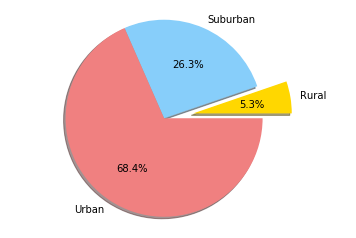

In [111]:
# Build Pie Chart
#Use the City Pie index for wedge labels.
rides_city.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Explode the section of the pie chart.
explode = (0.3,0,0)

#Create the pie chart.
plt.pie(rides_city, labels = rides_city.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)

#Equal Axis.
plt.axis("equal")

# Save Figure
plt.savefig("RidesByCity.png")

In [103]:
# Show Figure
plt.show()

## Total Drivers by City Type

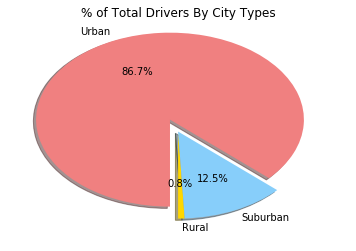

In [104]:
# Calculate Driver Percents
driver_city = rides_city = ride_data_complete.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
   #Create index labels
driver_city.index
   
    #Set colors
colors = ["gold","lightskyblue","lightcoral"]

# Setting pie chart to explode mode
explode = (0, 0, 0.15)

# Setting the title
plt.title("% of Total Drivers By City Types")

#Create the pie chart.
plt.pie(driver_city, labels = driver_city.index, autopct = "%1.1f%%", colors = colors,
        explode = explode, shadow = True, startangle = 270)

# Save Figure
plt.savefig("TotalDriversbyCity.png")



In [ ]:
# Show Figure
plt.show()

In [105]:
#3 observations:
#1. Urban Cities have higher number of riders, drivers and rides.
#2. The average number of rides in Urban cities is 25.
#3. The average cost per ride is lower in Urban cities vs Rural cities.